-----

### Crowdguru annotations inspection and transformation

In [221]:
from os.path import join
import pandas as pd
from constants import DATA_BASE

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

pd.options.display.max_columns = 80
pd.options.display.max_rows = 200
pd.options.display.precision = 3
np.set_printoptions(precision=3)

In [77]:
df = pd.read_excel(join(DATA_BASE, '20181217_Lieferung_Universität Düsseldorf_Label-Bewertungen_Crowd Guru.xlsx')).rename(columns={'Case ID': 'Case_ID'})
df

,CG ID,Case_ID,dataset,topic_idx,terms komplett (kommasepariert),term0,term1,term2,term3,term4,term5,term6,term7,term8,term9,label0,Bewertung label0,label1,Bewertung label1,label2,Bewertung label2,label3,Bewertung label3,label4,Bewertung label4,label5,Bewertung label5,label6,Bewertung label6,label7,Bewertung label7,label8,Bewertung label8,label9,Bewertung label9,label10,Bewertung label10,label11,Bewertung label11,label12,Bewertung label12,label13,Bewertung label13,label14,Bewertung label14,label15,Bewertung label15,label16,Bewertung label16,label17,Bewertung label17,label18,Bewertung label18,label19,Bewertung label19,guru_id anonymisiert,Kommentar (optional)
0,20181212_0658,1,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,1,Wissenschaft,2,Grundlagenforschung,1,Humanwissenschaft,1,Forschung und Lehre,1,Methodologie,1,Wissenschaftler,2,Wissenschaftliche Gesellschaft,1,Runologie,1,Forschung,2,Philosophie,1,Sozialwissenschaften,1,Fachgebiet,1,Anthropologie,1,Neurowissenschaften,1,Akademie der Wissenschaften,1,Philologie,1,Medizingeschichte,1,Wissenschaftliche Arbeit,1,Deutsches Historisches Institut,1,133,NaN
1,20181212_0439,1,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,3,Wissenschaft,3,Grundlagenforschung,3,Humanwissenschaft,3,Forschung und Lehre,3,Methodologie,2,Wissenschaftler,3,Wissenschaftliche Gesellschaft,3,Runologie,3,Forschung,3,Philosophie,3,Sozialwissenschaften,3,Fachgebiet,3,Anthropologie,3,Neurowissenschaften,2,Akademie der Wissenschaften,3,Philologie,3,Medizingeschichte,2,Wissenschaftliche Arbeit,3,Deutsches Historisches Institut,2,1300537,NaN
2,20181212_0001,1,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,1,Wissenschaft,3,Grundlagenforschung,1,Humanwissenschaft,1,Forschung und Lehre,2,Methodologie,0,Wissenschaftler,3,Wissenschaftliche Gesellschaft,1,Runologie,0,Forschung,3,Philosophie,0,Sozialwissenschaften,1,Fachgebiet,0,Anthropologie,0,Neurowissenschaften,1,Akademie der Wissenschaften,0,Philologie,0,Medizingeschichte,0,Wissenschaftliche Arbeit,1,Deutsches Historisches Institut,0,3400103,NaN
3,20181212_1972,1,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,1,Wissenschaft,2,Grundlagenforschung,1,Humanwissenschaft,2,Forschung und Lehre,2,Methodologie,1,Wissenschaftler,2,Wissenschaftliche Gesellschaft,1,Runologie,1,Forschung,2,Philosophie,2,Sozialwissenschaften,2,Fachgebiet,2,Anthropologie,2,Neurowissenschaften,2,Akademie der Wissenschaften,1,Philologie,2,Medizingeschichte,1,Wissenschaftliche Arbeit,2,Deutsches Historisches Institut,1,3800338,NaN
4,20181212_1534,1,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,1,Wissenschaft,3,Grundlagenforschung,1,Humanwissenschaft,1,Forschung und Lehre,3,Methodologie,1,Wissenschaftler,1,Wissenschaftliche Gesellschaft,2,Runologie,1,Forschung,3,Philosophie,1,Sozialwissenschaften,1,Fachgebiet,1,Anthropologie,1,Neurowissenschaften,1,Akademie der Wissenschaften,1,Philologie,1,Medizingeschichte,1,Wissenschaftliche Arbeit,1,Deutsches Historisches Institut,1,5000555,NaN
5,20181212_1315,1,PoliticalSpeeches,0,"Wissenschaft, Forschung, Wissenschaftler, Erke...",Wissenschaft,Forschung,Wissenschaftler,Erkenntnis,Professor,Politik,Kunst,Forscher,Krankheit,Gesellschaft,Naturwissenschaftler,3,Wissenschaft,3,Grundlagenforschung,3,Humanwissenschaft,3,F

In [80]:
def transform(grp):
    sers = []
    dic = dict()
    for i in range(20):
        label = grp[f'label{i}'][0]
        annotations = grp.loc[:, f'Bewertung label{i}'].reset_index(drop=True).rename(index=lambda x: f'annotation{x}')
        guru_ids = grp.loc[:, f'guru_id anonymisiert'].reset_index(drop=True).rename(index=lambda x: f'guru_id{x}')
        ser = annotations.append(guru_ids)
        ser.name = label
        sers.append(ser)
    df = pd.DataFrame(sers)
    return df
        
x = df.set_index(['CG ID', 'Case_ID', 'dataset', 'topic_idx']).iloc[:, 11:].groupby('Case_ID', sort=False).apply(transform)
x

annotation0  annotation1  \
Case_ID                                                              
1       Naturwissenschaftler                        1            3   
        Wissenschaft                                2            3   
        Grundlagenforschung                         1            3   
        Humanwissenschaft                           1            3   
        Forschung und Lehre                         1            3   
        Methodologie                                1            2   
        Wissenschaftler                             2            3   
        Wissenschaftliche Gesellschaft              1            3   
        Runologie                                   1            3   
        Forschung                                   2            3   
        Philosophie                                 1            3   
        Sozialwissenschaften                        1            3   
        Fachgebiet                                  1            3   
        Anthropologie                               1            3   
        Neurowissenschaften                         1            2   
        Akademie der Wissenschaften                 1            3   
        Philologie                                  1            3   
        Medizingeschichte                           1            2   
        Wissenschaftliche Arbeit                    1            3   
        Deutsches Historisches Institut             1            2   
2       Aspekte Salzburg                            1            0   
        Klassische Musik                            1            3   
        Andreas Staier                              1            0   
        Musik sein                                  1            0   
        Kunstform                                   1            1   
        Hochschule für Musik                        1            1   
        Bayerischer Poetentaler                     1            0   
        Musik                                       2            2   
        Konzert                                     1            3   
        Alte Musik                                  1            2   
        Aufführung                                  1            2   
        Neue Musik                                  1            2   
        Weltmusik                                   1            1   
        Musikkritiker                               1            0   
        Volksmusik                                  1            1   
        Singer-Songwriter                           1            0   
        Musiker                                     1            2   
        Liederabend                                 1            1   
        Tanzmusik                                   1            0   
        Liedermacher                                1            0   
3       Religion                                    3            2   
        Heilige Schriften                           1            1   
        Christentum                                 1            1   
        Ostkirchenkunde                             1            0   
        Judentum                                    1            1   
        Religiöse Minderheit                        1            2   
        Atheismus                                   1            2   
        Offenbarungsreligion                        1            2   
        Zusammenleben                               0            1   
        Orthodoxie                                  1            0   
        Weltanschauung                              1            3   
        Christliche Werte                           1            1   
        Theologie                                   3            3   
        Glaube                                      3            2   
        Gesetzesreligion                            1            1   
        Symbolische Bücher                          

In [167]:
x[annotation_cols].query('Case_ID == 10')

annotation0  \
Case_ID                                                              
10      Arbeitskreis selbständiger Kultur-Institute              1   
        Stiftung Preußischer Kulturbesitz                        1   
        Hauptstadtkulturfonds                                    1   
        Kulturstiftung der Länder                                1   
        Europäischer Kulturpreis                                 1   
        Stiftung Schleswig-Holsteinische Landesmuseen            1   
        Stiftung Kunstfonds                                      1   
        Hermann Reemtsma Stiftung                                1   
        Niedersächsische Sparkassenstiftung                      1   
        Kulturstiftung des Freistaates Sachsen                   1   
        Deutsche Telekom Stiftung                                1   
        Zürcher Filmstiftung                                     1   
        Bibliothek des Jahres                                    0   
        Förderprogramm                                           1   
        Kulturstiftung Hansestadt Lübeck                         1   
        Kulturministerium                                        1   
        Hessische Filmförderung                                  1   
        Stiftung Südtiroler Sparkasse                            1   
        Kulturpreis des Landes Oberösterreich                    1   
        Kulturförderung                                          1   

                                                       annotation1  \
Case_ID                                                              
10      Arbeitskreis selbständiger Kultur-Institute              1   
        Stiftung Preußischer Kulturbesitz                        1   
        Hauptstadtkulturfonds                                    2   
        Kulturstiftung der Länder                                2   
        Europäischer Kulturpreis                                 2   
        Stiftung Schleswig-Holsteinische Landesmuseen            2   
        Stiftung Kunstfonds                                      2   
        Hermann Reemtsma Stiftung                                1   
        Niedersächsische Sparkassenstiftung                      0   
        Kulturstiftung des Freistaates Sachsen                   2   
        Deutsche Telekom Stiftung                                1   
        Zürcher Filmstiftung                                     1   
        Bibliothek des Jahres                                    0   
        Förderprogramm                                           1   
        Kulturstiftung Hansestadt Lübeck                         2   
        Kulturministerium                                        3   
        Hessische Filmförderung                                  2   
        Stiftung Südtiroler Sparkasse                            0   
        Kulturpreis des Landes Oberösterreich                    2   
        Kulturförderung                                          3   

                                                       annotation2  \
Case_ID                                                              
10      Arbeitskreis selbständiger Kultur-Institute              3   
        Stiftung Preußischer Kulturbesitz                        3   
        Hauptstadtkulturfonds                                    3   
        Kulturstiftung der Länder                                3   
        Europäischer Kulturpreis                                 3   
        Stiftung Schleswig-Holsteinische Landesmuseen            3   
        Stiftung Kunstfonds                                      3   
        Hermann Reemtsma Stiftung                                3   
        Niedersächsische Sparkassenstiftung                      3   
        Kulturstiftung des Freistaates Sachsen                   3   
        Deutsche Telekom Stiftung                                3   
        Zürcher Filmstiftung                                   

In [166]:
x[annotation_cols].query('Case_ID == 10').corr()

,annotation0,annotation1,annotation2,annotation3,annotation4,annotation5,annotation6,annotation7,annotation8,annotation9
annotation0,1.000,0.397,NaN,0.090,0.437,0.464,0.175,0.609,0.123,0.094
annotation1,0.397,1.000,NaN,0.453,0.471,0.389,0.539,0.541,0.486,0.508
annotation2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annotation3,0.090,0.453,NaN,1.000,0.053,0.132,0.532,0.184,0.240,-0.161
annotation4,0.437,0.471,NaN,0.053,1.000,0.642,0.277,0.149,0.333,0.574
annotation5,0.464,0.389,NaN,0.132,0.642,1.000,0.400,0.105,0.361,0.119
annotation6,0.175,0.539,NaN,0.532,0.277,0.400,1.000,0.225,0.370,0.283
annotation7,0.609,0.541,NaN,0.184,0.149,0.105,0.225,1.000,0.251,0.375
annotation8,0.123,0.486,NaN,0.240,0.333,0.361,0.370,0.251,1.000,0.408
annotation9,0.094,0.508,NaN,-0.161,0.574,0.119,0.283,0.375,0.408,1.000


In [172]:
ann_corr = x[annotation_cols].groupby('Case_ID').apply(lambda x: x.corr().mean())
ann_corr

,annotation0,annotation1,annotation2,annotation3,annotation4,annotation5,annotation6,annotation7,annotation8,annotation9
Case_ID,,,,,,,,,,
1,0.343,0.354,0.410,0.313,0.343,0.276,0.345,0.111,0.024,0.266
2,0.383,0.538,0.380,0.277,0.331,0.589,0.432,0.586,0.437,0.278
3,0.572,0.377,0.547,0.551,0.586,0.470,0.503,0.528,-0.153,0.517
4,0.451,0.527,0.436,0.271,0.431,0.541,0.458,0.302,0.455,0.402
5,0.371,0.397,0.364,0.481,0.397,0.244,0.272,0.453,0.041,0.422
6,0.537,0.383,0.613,0.447,0.535,0.202,0.636,0.616,0.596,0.602
7,0.635,0.604,0.553,0.663,0.580,0.624,0.566,0.357,0.510,0.618
8,0.367,0.489,0.570,0.638,0.683,0.617,0.528,0.679,0.544,0.623
9,0.396,0.510,0.183,0.361,0.433,0.460,0.384,0.512,0.290,0.355


In [216]:
gurus = x[guru_cols].groupby('Case_ID').first()
gurus

,guru_id0,guru_id1,guru_id2,guru_id3,guru_id4,guru_id5,guru_id6,guru_id7,guru_id8,guru_id9
Case_ID,,,,,,,,,,
1,133,1300537,3400103,3800338,5000555,5500469,6000143,6800408,8000582,8500047
2,133,1500439,2000137,5500469,5800222,6000151,6200375,6400134,6800408,7400575
3,133,2300128,3400103,3500144,3500531,3800338,6400134,6800408,8000582,8500047
4,133,500321,1300537,1800143,3500531,6800408,7400575,8000582,8500047,9100058
5,133,1800143,3400504,3800338,5000555,6800408,7700376,7800484,8000582,8500047
6,133,1100161,2600295,3400103,3800338,5500469,6000143,6500418,6800408,9000581
7,133,500321,1500439,1800143,3400504,4800293,6800408,8000582,8500047,9000581
8,133,1800143,3500144,4200319,6000143,6200375,6800408,7800484,8000582,9000581
9,133,500321,2100580,2300128,3800288,3800338,4000580,5400560,6800408,9900581


In [260]:
# find annotators whose annotations do not vary (resulting in corr == NaN)
g = gurus.copy()
g[~ann_corr.isnull().values] = 0
g_sum = g.sum(axis=1)
print('the following annotators have annotated some cases uniformly:')
print(np.unique(g[g_sum > 0].values).tolist()[1:])
g_min = g[g_sum > 0]
g_min

the following annotators have annotated some cases uniformly:
[133, 1300537, 1800484, 2600295, 3800338, 4200319, 4400145, 5000555, 5500469, 5800534, 6000143, 6200375, 6800408, 7700376, 7800484, 8000582, 9100058, 9700336, 9900581]


,guru_id0,guru_id1,guru_id2,guru_id3,guru_id4,guru_id5,guru_id6,guru_id7,guru_id8,guru_id9
Case_ID,,,,,,,,,,
10,0,0,5500469,0,0,0,0,0,0,0
14,133,0,0,0,0,0,0,0,0,0
15,0,0,0,0,0,0,0,0,9100058,0
25,0,0,0,0,0,5000555,0,0,8000582,0
28,133,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,8000582,9100058
37,0,0,0,0,0,0,0,0,8000582,0
40,0,0,0,0,5500469,0,0,0,0,0
49,133,0,0,0,0,0,0,0,0,8000582


In [288]:
# also remove constant annotations

def remove_constants(grp):
    if grp.name in g_min.index:
        mask = g_min.loc[grp.name] > 0
        grp.loc[:, mask.values] = np.nan
    return grp

anno_clean_full = anno_clean.groupby('Case_ID').apply(remove_constants).query('Case_ID == 14')
anno_clean_full

annotation0  annotation1  \
Case_ID                                                                        
14      Kredit                                              NaN          2.0   
        Kreditinstitut                                      NaN          3.0   
        Die Bank                                            NaN          3.0   
        Startkapital                                        NaN          1.0   
        Spareinlage                                         NaN          1.0   
        Deutsche Bank                                       NaN          1.0   
        Auszahlung                                          NaN          1.0   
        Entschädigungseinrichtung deutscher Banken          NaN          1.0   
        Landesbank                                          NaN          2.0   
        Hausbank                                            NaN          2.0   
        Refco                                               NaN          0.0   
        Einzahlung                                          NaN          1.0   
        Bargeld                                             NaN          1.0   
        Sparkasse                                           NaN          3.0   
        Banco Popular                                       NaN          1.0   
        Passivgeschäft                                      NaN          0.0   
        Genossenschaftsbank                                 NaN          3.0   
        Girokonto                                           NaN          2.0   
        Zahlung                                             NaN          1.0   
        Geldinstitute                                       NaN          3.0   

                                                    annotation2  annotation3  \
Case_ID                                                                        
14      Kredit                                              2.0          NaN   
        Kreditinstitut                                      3.0          NaN   
        Die Bank                                            2.0          NaN   
        Startkapital                                        2.0          NaN   
        Spareinlage                                         2.0          NaN   
        Deutsche Bank                                       1.0          NaN   
        Auszahlung                                          2.0          NaN   
        Entschädigungseinrichtung deutscher Banken          1.0          NaN   
        Landesbank                                          2.0          NaN   
        Hausbank                                            2.0          NaN   
        Refco                                               0.0          NaN   
        Einzahlung                                          2.0          NaN   
        Bargeld                                             2.0          NaN   
        Sparkasse                                           2.0          NaN   
        Banco Popular                                       1.0          NaN   
        Passivgeschäft                                      2.0          NaN   
        Genossenschaftsbank                                 2.0          NaN   
        Girokonto                                           2.0          NaN   
        Zahlung                                             2.0          NaN   
        Geldinstitute                                       3.0          NaN   

                                                    annotation4  annotation5  \
Case_ID                                                                        
14      Kredit                                              1.0          2.0   
        Kreditinstitut                                      1.0          2.0   
        Die Bank                                            0.0          2.0   
        Startkapital                                        0.0          2.0   
        Spareinlage                               

In [259]:
anno_clean.query('Case_ID == 14')

annotation0  annotation1  \
Case_ID                                                                        
14      Kredit                                              1.0          2.0   
        Kreditinstitut                                      1.0          3.0   
        Die Bank                                            1.0          3.0   
        Startkapital                                        1.0          1.0   
        Spareinlage                                         1.0          1.0   
        Deutsche Bank                                       1.0          1.0   
        Auszahlung                                          1.0          1.0   
        Entschädigungseinrichtung deutscher Banken          1.0          1.0   
        Landesbank                                          1.0          2.0   
        Hausbank                                            1.0          2.0   
        Refco                                               1.0          0.0   
        Einzahlung                                          1.0          1.0   
        Bargeld                                             1.0          1.0   
        Sparkasse                                           1.0          3.0   
        Banco Popular                                       1.0          1.0   
        Passivgeschäft                                      1.0          0.0   
        Genossenschaftsbank                                 1.0          3.0   
        Girokonto                                           1.0          2.0   
        Zahlung                                             1.0          1.0   
        Geldinstitute                                       1.0          3.0   

                                                    annotation2  annotation3  \
Case_ID                                                                        
14      Kredit                                              2.0          NaN   
        Kreditinstitut                                      3.0          NaN   
        Die Bank                                            2.0          NaN   
        Startkapital                                        2.0          NaN   
        Spareinlage                                         2.0          NaN   
        Deutsche Bank                                       1.0          NaN   
        Auszahlung                                          2.0          NaN   
        Entschädigungseinrichtung deutscher Banken          1.0          NaN   
        Landesbank                                          2.0          NaN   
        Hausbank                                            2.0          NaN   
        Refco                                               0.0          NaN   
        Einzahlung                                          2.0          NaN   
        Bargeld                                             2.0          NaN   
        Sparkasse                                           2.0          NaN   
        Banco Popular                                       1.0          NaN   
        Passivgeschäft                                      2.0          NaN   
        Genossenschaftsbank                                 2.0          NaN   
        Girokonto                                           2.0          NaN   
        Zahlung                                             2.0          NaN   
        Geldinstitute                                       3.0          NaN   

                                                    annotation4  annotation5  \
Case_ID                                                                        
14      Kredit                                              1.0          2.0   
        Kreditinstitut                                      1.0          2.0   
        Die Bank                                            0.0          2.0   
        Startkapital                                        0.0          2.0   
        Spareinlage                               

In [232]:
# collect and average the individual annotators correlations

from collections import defaultdict
annotators_correlations = defaultdict(list)
for i in range(219):
    for j in range(10):
        guru = gurus.iloc[i, j]
        corr = ann_corr.iloc[i, j]
        annotators_correlations[guru].append(corr)

ac_list = []
for ann, cor in annotators_correlations.items():
    a = np.mean(cor)
    b = np.nanmean(cor)
    #print(f'{ann}: {a:.2f}  (ignoring nan: {b:.2f})')
    ac_list.append((b, a, ann))

df_ac = pd.DataFrame.from_records(sorted(ac_list), columns=['cor_ign_nan', 'cor_w_nan', 'guru'])
df_ac

,cor_ign_nan,cor_w_nan,guru
0,0.245,NaN,8000582
1,0.276,NaN,1800484
2,0.314,NaN,9700336
3,0.324,0.324,7400575
4,0.324,0.324,7800217
5,0.331,0.331,9000581
6,0.343,0.343,2600582
7,0.345,0.345,2000137
8,0.346,0.346,8100414
9,0.347,0.347,4000030


In [244]:
bad_gurus = df_ac.loc[df_ac.cor_ign_nan < 0.4, 'guru']
bad_gurus

0     8000582
1     1800484
2     9700336
3     7400575
4     7800217
5     9000581
6     2600582
7     2000137
8     8100414
9     4000030
10    9100058
11     500559
12    3800288
13    9900581
14    2100580
15    4600523
16    1100242
17    4200319
18    5800534
19    5500469
20    5000555
21    1300537
22    8500047
23    1000267
Name: guru, dtype: int64

In [245]:
guru_mask = x[guru_cols].applymap(lambda x: x in bad_gurus.values)
guru_mask

guru_id0  guru_id1  guru_id2  \
Case_ID                                                                  
1       Naturwissenschaftler                 False      True     False   
        Wissenschaft                         False      True     False   
        Grundlagenforschung                  False      True     False   
        Humanwissenschaft                    False      True     False   
        Forschung und Lehre                  False      True     False   
        Methodologie                         False      True     False   
        Wissenschaftler                      False      True     False   
        Wissenschaftliche Gesellschaft       False      True     False   
        Runologie                            False      True     False   
        Forschung                            False      True     False   
        Philosophie                          False      True     False   
        Sozialwissenschaften                 False      True     False   
        Fachgebiet                           False      True     False   
        Anthropologie                        False      True     False   
        Neurowissenschaften                  False      True     False   
        Akademie der Wissenschaften          False      True     False   
        Philologie                           False      True     False   
        Medizingeschichte                    False      True     False   
        Wissenschaftliche Arbeit             False      True     False   
        Deutsches Historisches Institut      False      True     False   
2       Aspekte Salzburg                     False     False      True   
        Klassische Musik                     False     False      True   
        Andreas Staier                       False     False      True   
        Musik sein                           False     False      True   
        Kunstform                            False     False      True   
        Hochschule für Musik                 False     False      True   
        Bayerischer Poetentaler              False     False      True   
        Musik                                False     False      True   
        Konzert                              False     False      True   
        Alte Musik                           False     False      True   
        Aufführung                           False     False      True   
        Neue Musik                           False     False      True   
        Weltmusik                            False     False      True   
        Musikkritiker                        False     False      True   
        Volksmusik                           False     False      True   
        Singer-Songwriter                    False     False      True   
        Musiker                              False     False      True   
        Liederabend                          False     False      True   
        Tanzmusik                            False     False      True   
        Liedermacher                         False     False      True   
3       Religion                             False     False     False   
        Heilige Schriften                    False     False     False   
        Christentum                          False     False     False   
        Ostkirchenkunde                      False     False     False   
        Judentum                             False     False     False   
        Religiöse Minderheit                 False     False     False   
        Atheismus                            False     False     False   
        Offenbarungsreligion                 False     False     False   
        Zusammenleben                        False     False     False   
        Orthodoxie                           False     False     False   
        Weltanschauung                       False     False     False   
        Christliche Werte                    False     False     False   
        Theologie                            F

In [247]:
anno_clean = x[annotation_cols].copy()
anno_clean[guru_mask.values] = np.nan
anno_clean

annotation0  annotation1  \
Case_ID                                                              
1       Naturwissenschaftler                      1.0          NaN   
        Wissenschaft                              2.0          NaN   
        Grundlagenforschung                       1.0          NaN   
        Humanwissenschaft                         1.0          NaN   
        Forschung und Lehre                       1.0          NaN   
        Methodologie                              1.0          NaN   
        Wissenschaftler                           2.0          NaN   
        Wissenschaftliche Gesellschaft            1.0          NaN   
        Runologie                                 1.0          NaN   
        Forschung                                 2.0          NaN   
        Philosophie                               1.0          NaN   
        Sozialwissenschaften                      1.0          NaN   
        Fachgebiet                                1.0          NaN   
        Anthropologie                             1.0          NaN   
        Neurowissenschaften                       1.0          NaN   
        Akademie der Wissenschaften               1.0          NaN   
        Philologie                                1.0          NaN   
        Medizingeschichte                         1.0          NaN   
        Wissenschaftliche Arbeit                  1.0          NaN   
        Deutsches Historisches Institut           1.0          NaN   
2       Aspekte Salzburg                          1.0          0.0   
        Klassische Musik                          1.0          3.0   
        Andreas Staier                            1.0          0.0   
        Musik sein                                1.0          0.0   
        Kunstform                                 1.0          1.0   
        Hochschule für Musik                      1.0          1.0   
        Bayerischer Poetentaler                   1.0          0.0   
        Musik                                     2.0          2.0   
        Konzert                                   1.0          3.0   
        Alte Musik                                1.0          2.0   
        Aufführung                                1.0          2.0   
        Neue Musik                                1.0          2.0   
        Weltmusik                                 1.0          1.0   
        Musikkritiker                             1.0          0.0   
        Volksmusik                                1.0          1.0   
        Singer-Songwriter                         1.0          0.0   
        Musiker                                   1.0          2.0   
        Liederabend                               1.0          1.0   
        Tanzmusik                                 1.0          0.0   
        Liedermacher                              1.0          0.0   
3       Religion                                  3.0          2.0   
        Heilige Schriften                         1.0          1.0   
        Christentum                               1.0          1.0   
        Ostkirchenkunde                           1.0          0.0   
        Judentum                                  1.0          1.0   
        Religiöse Minderheit                      1.0          2.0   
        Atheismus                                 1.0          2.0   
        Offenbarungsreligion                      1.0          2.0   
        Zusammenleben                             0.0          1.0   
        Orthodoxie                                1.0          0.0   
        Weltanschauung                            1.0          3.0   
        Christliche Werte                         1.0          1.0   
        Theologie                                 3.0          3.0   
        Glaube                                    3.0          2.0   
        Gesetzesreligion                          1.0          1.0   
        Symbolische Bücher                        0.

In [251]:
y_clean = anno_clean[annotation_cols].copy()
y_clean['avg'] = y_clean[annotation_cols].mean(axis=1)
y_clean['sd'] = y_clean[annotation_cols].std(axis=1)
y_clean['cnt'] = y_clean[annotation_cols].count(axis=1)
print(y_clean.avg.mean())
print(y_clean.cnt.mean())
y_clean

1.2234041820685726
6.936073059360731


annotation0  annotation1  \
Case_ID                                                              
1       Naturwissenschaftler                      1.0          NaN   
        Wissenschaft                              2.0          NaN   
        Grundlagenforschung                       1.0          NaN   
        Humanwissenschaft                         1.0          NaN   
        Forschung und Lehre                       1.0          NaN   
        Methodologie                              1.0          NaN   
        Wissenschaftler                           2.0          NaN   
        Wissenschaftliche Gesellschaft            1.0          NaN   
        Runologie                                 1.0          NaN   
        Forschung                                 2.0          NaN   
        Philosophie                               1.0          NaN   
        Sozialwissenschaften                      1.0          NaN   
        Fachgebiet                                1.0          NaN   
        Anthropologie                             1.0          NaN   
        Neurowissenschaften                       1.0          NaN   
        Akademie der Wissenschaften               1.0          NaN   
        Philologie                                1.0          NaN   
        Medizingeschichte                         1.0          NaN   
        Wissenschaftliche Arbeit                  1.0          NaN   
        Deutsches Historisches Institut           1.0          NaN   
2       Aspekte Salzburg                          1.0          0.0   
        Klassische Musik                          1.0          3.0   
        Andreas Staier                            1.0          0.0   
        Musik sein                                1.0          0.0   
        Kunstform                                 1.0          1.0   
        Hochschule für Musik                      1.0          1.0   
        Bayerischer Poetentaler                   1.0          0.0   
        Musik                                     2.0          2.0   
        Konzert                                   1.0          3.0   
        Alte Musik                                1.0          2.0   
        Aufführung                                1.0          2.0   
        Neue Musik                                1.0          2.0   
        Weltmusik                                 1.0          1.0   
        Musikkritiker                             1.0          0.0   
        Volksmusik                                1.0          1.0   
        Singer-Songwriter                         1.0          0.0   
        Musiker                                   1.0          2.0   
        Liederabend                               1.0          1.0   
        Tanzmusik                                 1.0          0.0   
        Liedermacher                              1.0          0.0   
3       Religion                                  3.0          2.0   
        Heilige Schriften                         1.0          1.0   
        Christentum                               1.0          1.0   
        Ostkirchenkunde                           1.0          0.0   
        Judentum                                  1.0          1.0   
        Religiöse Minderheit                      1.0          2.0   
        Atheismus                                 1.0          2.0   
        Offenbarungsreligion                      1.0          2.0   
        Zusammenleben                             0.0          1.0   
        Orthodoxie                                1.0          0.0   
        Weltanschauung                            1.0          3.0   
        Christliche Werte                         1.0          1.0   
        Theologie                                 3.0          3.0   
        Glaube                                    3.0          2.0   
        Gesetzesreligion                          1.0          1.0   
        Symbolische Bücher                        0.

In [289]:
y_clean_full = anno_clean_full[annotation_cols].copy()
y_clean_full['avg'] = y_clean_full[annotation_cols].mean(axis=1)
y_clean_full['sd'] = y_clean_full[annotation_cols].std(axis=1)
y_clean_full['cnt'] = y_clean_full[annotation_cols].count(axis=1)
print(y_clean_full.avg.mean())
print(y_clean_full.cnt.mean())
y_clean_full

1.2800000000000002
5.0


annotation0  annotation1  \
Case_ID                                                                        
14      Kredit                                              NaN          2.0   
        Kreditinstitut                                      NaN          3.0   
        Die Bank                                            NaN          3.0   
        Startkapital                                        NaN          1.0   
        Spareinlage                                         NaN          1.0   
        Deutsche Bank                                       NaN          1.0   
        Auszahlung                                          NaN          1.0   
        Entschädigungseinrichtung deutscher Banken          NaN          1.0   
        Landesbank                                          NaN          2.0   
        Hausbank                                            NaN          2.0   
        Refco                                               NaN          0.0   
        Einzahlung                                          NaN          1.0   
        Bargeld                                             NaN          1.0   
        Sparkasse                                           NaN          3.0   
        Banco Popular                                       NaN          1.0   
        Passivgeschäft                                      NaN          0.0   
        Genossenschaftsbank                                 NaN          3.0   
        Girokonto                                           NaN          2.0   
        Zahlung                                             NaN          1.0   
        Geldinstitute                                       NaN          3.0   

                                                    annotation2  annotation3  \
Case_ID                                                                        
14      Kredit                                              2.0          NaN   
        Kreditinstitut                                      3.0          NaN   
        Die Bank                                            2.0          NaN   
        Startkapital                                        2.0          NaN   
        Spareinlage                                         2.0          NaN   
        Deutsche Bank                                       1.0          NaN   
        Auszahlung                                          2.0          NaN   
        Entschädigungseinrichtung deutscher Banken          1.0          NaN   
        Landesbank                                          2.0          NaN   
        Hausbank                                            2.0          NaN   
        Refco                                               0.0          NaN   
        Einzahlung                                          2.0          NaN   
        Bargeld                                             2.0          NaN   
        Sparkasse                                           2.0          NaN   
        Banco Popular                                       1.0          NaN   
        Passivgeschäft                                      2.0          NaN   
        Genossenschaftsbank                                 2.0          NaN   
        Girokonto                                           2.0          NaN   
        Zahlung                                             2.0          NaN   
        Geldinstitute                                       3.0          NaN   

                                                    annotation4  annotation5  \
Case_ID                                                                        
14      Kredit                                              1.0          2.0   
        Kreditinstitut                                      1.0          2.0   
        Die Bank                                            0.0          2.0   
        Startkapital                                        0.0          2.0   
        Spareinlage                               

In [249]:
y = x[annotation_cols].copy()
y['avg'] = y[annotation_cols].mean(axis=1)
y['sd'] = y[annotation_cols].std(axis=1)
print(y.avg.mean())
y

1.4094748858447474


annotation0  annotation1  \
Case_ID                                                              
1       Naturwissenschaftler                        1            3   
        Wissenschaft                                2            3   
        Grundlagenforschung                         1            3   
        Humanwissenschaft                           1            3   
        Forschung und Lehre                         1            3   
        Methodologie                                1            2   
        Wissenschaftler                             2            3   
        Wissenschaftliche Gesellschaft              1            3   
        Runologie                                   1            3   
        Forschung                                   2            3   
        Philosophie                                 1            3   
        Sozialwissenschaften                        1            3   
        Fachgebiet                                  1            3   
        Anthropologie                               1            3   
        Neurowissenschaften                         1            2   
        Akademie der Wissenschaften                 1            3   
        Philologie                                  1            3   
        Medizingeschichte                           1            2   
        Wissenschaftliche Arbeit                    1            3   
        Deutsches Historisches Institut             1            2   
2       Aspekte Salzburg                            1            0   
        Klassische Musik                            1            3   
        Andreas Staier                              1            0   
        Musik sein                                  1            0   
        Kunstform                                   1            1   
        Hochschule für Musik                        1            1   
        Bayerischer Poetentaler                     1            0   
        Musik                                       2            2   
        Konzert                                     1            3   
        Alte Musik                                  1            2   
        Aufführung                                  1            2   
        Neue Musik                                  1            2   
        Weltmusik                                   1            1   
        Musikkritiker                               1            0   
        Volksmusik                                  1            1   
        Singer-Songwriter                           1            0   
        Musiker                                     1            2   
        Liederabend                                 1            1   
        Tanzmusik                                   1            0   
        Liedermacher                                1            0   
3       Religion                                    3            2   
        Heilige Schriften                           1            1   
        Christentum                                 1            1   
        Ostkirchenkunde                             1            0   
        Judentum                                    1            1   
        Religiöse Minderheit                        1            2   
        Atheismus                                   1            2   
        Offenbarungsreligion                        1            2   
        Zusammenleben                               0            1   
        Orthodoxie                                  1            0   
        Weltanschauung                              1            3   
        Christliche Werte                           1            1   
        Theologie                                   3            3   
        Glaube                                      3            2   
        Gesetzesreligion                            1            1   
        Symbolische Bücher                          

In [82]:
annotation_cols = [f'annotation{i}' for i in range(10)]
guru_cols = [f'guru_id{i}' for i in range(10)]

In [83]:
'# Annotatoren:', np.unique(x[guru_cols].values).size

('# Annotatoren:', 71)

In [84]:
x.groupby('Case_ID').apply(lambda x: np.unique(x[[f'guru_id{i}' for i in range(10)]].values).size).sort_values()

Case_ID
1      10
140    10
141    10
142    10
143    10
144    10
145    10
146    10
147    10
148    10
149    10
150    10
151    10
152    10
153    10
154    10
155    10
156    10
157    10
158    10
159    10
160    10
161    10
162    10
139    10
138    10
137    10
136    10
112    10
113    10
114    10
115    10
116    10
117    10
118    10
119    10
120    10
121    10
122    10
163    10
123    10
125    10
126    10
127    10
128    10
129    10
130    10
131    10
132    10
133    10
134    10
135    10
124    10
111    10
164    10
166    10
195    10
196    10
197    10
198    10
199    10
200    10
201    10
202    10
203    10
204    10
205    10
206    10
207    10
208    10
209    10
210    10
211    10
212    10
213    10
214    10
215    10
216    10
217    10
194    10
193    10
192    10
191    10
167    10
168    10
169    10
170    10
171    10
172    10
173    10
174    10
175    10
176    10
177    10
165    10
178    10
180    10
181    10
182    10
18

In [85]:
annos = x[annotation_cols].stack().reset_index(-1, drop=True)
gurus = x[guru_cols].stack().reset_index(-1, drop=True)
annos.name = 'annotation'
gurus.name = 'guru'
stacked = pd.concat([annos, gurus], axis=1)
stacked

annotation     guru
Case_ID                                                    
1       Naturwissenschaftler                     1      133
        Naturwissenschaftler                     3  1300537
        Naturwissenschaftler                     1  3400103
        Naturwissenschaftler                     1  3800338
        Naturwissenschaftler                     1  5000555
        Naturwissenschaftler                     3  5500469
        Naturwissenschaftler                     1  6000143
        Naturwissenschaftler                     1  6800408
        Naturwissenschaftler                     2  8000582
        Naturwissenschaftler                     1  8500047
        Wissenschaft                             2      133
        Wissenschaft                             3  1300537
        Wissenschaft                             3  3400103
        Wissenschaft                             2  3800338
        Wissenschaft                             3  5000555
        Wissenschaft                             3  5500469
        Wissenschaft                             2  6000143
        Wissenschaft                             1  6800408
        Wissenschaft                             1  8000582
        Wissenschaft                             2  8500047
        Grundlagenforschung                      1      133
        Grundlagenforschung                      3  1300537
        Grundlagenforschung                      1  3400103
        Grundlagenforschung                      1  3800338
        Grundlagenforschung                      1  5000555
        Grundlagenforschung                      3  5500469
        Grundlagenforschung                      1  6000143
        Grundlagenforschung                      1  6800408
        Grundlagenforschung                      2  8000582
        Grundlagenforschung                      2  8500047
        Humanwissenschaft                        1      133
        Humanwissenschaft                        3  1300537
        Humanwissenschaft                        1  3400103
        Humanwissenschaft                        2  3800338
        Humanwissenschaft                        1  5000555
        Humanwissenschaft                        3  5500469
        Humanwissenschaft                        1  6000143
        Humanwissenschaft                        3  6800408
        Humanwissenschaft                        2  8000582
        Humanwissenschaft                        1  8500047
        Forschung und Lehre                      1      133
        Forschung und Lehre                      3  1300537
        Forschung und Lehre                      2  3400103
        Forschung und Lehre                      2  3800338
        Forschung und Lehre                      3  5000555
        Forschung und Lehre                      3  5500469
        Forschung und Lehre                      1  6000143
        Forschung und Lehre                      1  6800408
        Forschung und Lehre                      1  8000582
        Forschung und Lehre                      2  8500047
        Methodologie                             1      133
        Methodologie                             2  1300537
        Methodologie                             0  3400103
        Methodologie                             1  3800338
        Methodologie                             1  5000555
        Methodologie                             3  5500469
        Methodologie                             1  6000143
        Methodologie                             1  6800408
        Methodologie                             2  8000582
        Methodologie                             1  8500047
        Wissenschaftler                          2      133
        Wissenschaftler                          3  1300537
        Wissenschaftler                          3  3400103
        Wissenschaftler                          2  3800338
        Wissenschaftler                          1  5000555
        Wissenschaft

In [155]:
topic.set_index('guru').sort_index()#.unstack('guru')

,label,annotation
guru,,
133,Aspekte Salzburg,1
133,Kunstform,1
133,Hochschule für Musik,1
133,Bayerischer Poetentaler,1
133,Musik,2
133,Liedermacher,1
133,Konzert,1
133,Musik sein,1
133,Aufführung,1


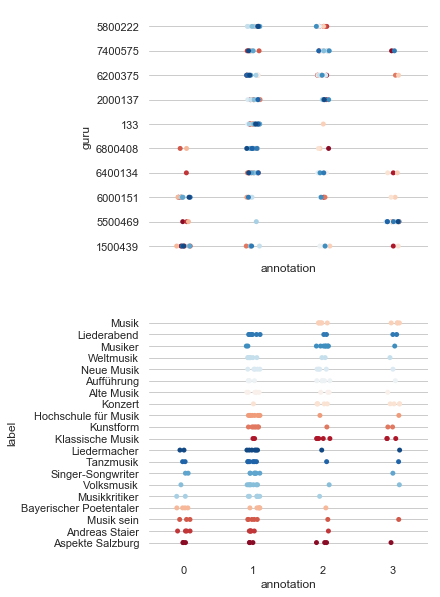

In [141]:
topic = (
    stacked
    .query('Case_ID == 2')
    .astype({'guru': str})
    .reset_index(-1)
    .rename(columns={'level_1': 'label'})
    .reset_index(drop=True)
)

sns.set(style="whitegrid")

# Initialize the figure
f, ax = plt.subplots(nrows=2, figsize=(5, 10), sharex=True)
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sp = sns.stripplot(
    x="annotation", y="guru", hue="label", data=topic, 
    #color='lightblue',
    orient='v',
    #dodge=.01,
    jitter=.1,
    #alpha=.75, 
    zorder=1,
    palette="RdBu",
    ax=ax[0],
)
ax[0].get_legend().set_visible(False)

sp = sns.stripplot(
    x="annotation", y="label", hue="label", data=topic, 
    #color='lightblue',
    orient='v',
    #dodge=.01,
    jitter=.1,
    #alpha=.75, 
    zorder=1,
    palette="RdBu",
    ax=ax[1],
)
ax[1].get_legend().set_visible(False)

# Show the conditional means
#sns.pointplot(x="annotation", y="guru", hue="label",
#              data=case1, dodge=.532, join=False, palette="dark",
#              markers="d", scale=.75, ci=None)

# Improve the legend 
#handles, labels = ax.get_legend_handles_labels()
#ax.legend(handles[3:], labels[3:], title="Annotations",
#          handletextpad=0, columnspacing=1,
#          loc="lower right", ncol=3, frameon=True)

In [60]:
def grp_plot(grp):
    annos = grp[annotation_cols].stack().reset_index(-1, drop=True)
    gurus = grp[guru_cols].stack().reset_index(-1, drop=True)
    annos.name = 'annotation'
    gurus.name = 'guru'
    grp = pd.concat([annos, gurus], axis=1)
    print(grp)
    #grp.plot(kind='scatter')

x[:10].groupby('Case ID').apply(grp_plot)

                                        annotation     guru
Case ID                                                    
1       Naturwissenschaftler                     1      133
        Naturwissenschaftler                     3  1300537
        Naturwissenschaftler                     1  3400103
        Naturwissenschaftler                     1  3800338
        Naturwissenschaftler                     1  5000555
        Naturwissenschaftler                     3  5500469
        Naturwissenschaftler                     1  6000143
        Naturwissenschaftler                     1  6800408
        Naturwissenschaftler                     2  8000582
        Naturwissenschaftler                     1  8500047
        Wissenschaft                             2      133
        Wissenschaft                             3  1300537
        Wissenschaft                             3  3400103
        Wissenschaft                             2  3800338
        Wissenschaft                    

""


1.4094748858447474

In [6]:
y.groupby('Case ID').apply(lambda grp: grp.sort_values('avg', ascending=False).head(5))

annotation0  \
Case ID Case ID                                                       
1       1       Forschung                                         2   
                Wissenschaft                                      2   
                Forschung und Lehre                               1   
                Wissenschaftler                                   2   
                Humanwissenschaft                                 1   
2       2       Musik                                             2   
                Konzert                                           1   
                Klassische Musik                                  1   
                Musiker                                           1   
                Aufführung                                        1   
3       3       Religion                                          3   
                Glaube                                            3   
                Theologie                                         3   
                Glaubensgemeinschaft                              1   
                Christentum                                       1   
4       4       Hochschule                                        3   
                Universität                                       2   
                Studium                                           2   
                Forschung und Lehre                               1   
                Technische Universität                            1   
5       5       Schule                                            2   
                Deutschunterricht                                 1   
                Schulunterricht                                   1   
                Schüler                                           2   
                Lehrer                                            2   
6       6       Finanzmarkt                                       2   
                Finanzkrise                                       2   
                Finanzsystem                                      1   
                Wirtschaftskrise                                  2   
                Wirtschaftsordnung                                2   
7       7       Europäische Union                                 2   
                Mitgliedstaaten der Europäischen Union            1   
                Europäische Nachbarschaftspolitik                 1   
                Europäische Wirtschaftsgemeinschaft               1   
                Mitgliedstaat                                     1   
8       8       Kooperation                                       2   
                Handelsbeziehung                                  0   
                Globalisierung                                    1   
                Südasien                                          1   
                Volksrepublik China                               2   
9       9       Mahnmal                                           1   
                Gedenkstätte                                      2   
                Erinnerungskultur                                 2   
                Erinnerungsort                                    1   
                Gedenktag                                         1   
10      10      Kulturförderung                                   1   
                Kulturstiftung der Länder                         1   
                Kulturministerium                                 1   
                Hauptstadtkulturfonds                             1   
                Stiftung Kunstfonds                               1   
11      11      Politik                                           2   
                Politisches System                                1   
                Bundespolitik                                     1   
                Innenpolitik                                      1   
                Regierungssystem                                  1   
12      1

In [7]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
dat = sm.datasets.get_rdataset("Guerry", "HistData").data
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Fri, 28 Dec 2018   Prob (F-statistic):           1.90e-08
Time:                        01:59:45   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [8]:
import numpy as np
import statsmodels.api as sm
nobs = 100
X = np.random.random((nobs, 2))
X = sm.add_constant(X)
beta = [1, .1, .5]
e = np.random.random(nobs)
y = np.dot(X, beta) + e
results = sm.OLS(y, X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     5.290
Date:                Fri, 28 Dec 2018   Prob (F-statistic):            0.00660
Time:                        01:59:52   Log-Likelihood:                -17.487
No. Observations:                 100   AIC:                             40.97
Df Residuals:                      97   BIC:                             48.79
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6459      0.080     20.488      0.0

In [9]:
sm.stats.inter_rater.fleiss_kappa(table, method='fleiss')

AttributeError: module 'statsmodels.stats.api' has no attribute 'inter_rater'